In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import feature_selection

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment 3 - Basic Predictions and Regression

## Questions

### Part 1 - Election Prediction

Suppose you are looking at an election in a fictional province. There are 7 total elctoral districts, and the winner in each district is determined by a first-past-the-post system (what we have in Canada - the most votes wins, regardless of share). There are two parties - the Purples and the Yellows. Whoever controls the most seats will be the ruling party - so in our 2 party scenario, the party who wins 4 or more of the districts will govern. There is an election every year, they love voting. 

Recent polling indicating the expected vote share in each district is shown in the "dist_polls" table below. These values are a composite of several polls that the experts have combined and weighted. The "Purple" values show the expected vote share of the Purple party, along with the variance of that expectation and the number of polls that were combined to get that result.  

As well, research has shown that the vote distribution is impacted by voter turnout. In general, the more people vote, the more the vote split shifts towards the Yellow party. We have data on past elections and the results, we expect that the turnout will be in line with the past elections - or more specifically, we have no reason to expect it to differ. This impact is measured in the table in code below - that table shows the voter turnout, in a percentage, as well as the change in the Yellow party's vote share (also in percentage) as compared to the polling averages. For example, if one row showed "52" and ".8", that would mean that voter turnout was 52%, and the Yellow party got .8% higher of a vote share than the polling showed. 

<b>What is the probability that the Purple Party controls the government after the election?</b>

<b>Note:</b> the errors and confidence intervals are not totally trivial. As part of the written answer, offer an evaluation of your confidence in the prediction, and why you think that. This is not a question with one specific error, your estimation will have some expected errors, somewhere. You may not have the tools to calculate it all the way through, that's fine. 

### Question 1 - Your Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>Based on poll results determine the probability that the purple team would win 
<li>Run a number of trials and determine the fraction of times Purple teal would win 
<li>remove the outlier from the turn out table and create a model. 
<li>predict the Yello_improvement useing the model 
<li> <b> What do you think about the error/accuracy:</b>>>> the r2 is about 80 percent so our model is pretty reliable and the errors look pretty small
<li> Even if 60 percent of the population vote the Yello improvement would only be abour 8 percent and considering that we are 95 percent confident that the 
<li>purple team would get between 75 to 80 percent of the votes. The yellow_imrovement is not good enough therefore we predict that the purple team will win. 

##### Setup Poll Data

The dataframe "dist_polls" contains all of the polls for each seat. Each value is expressed as expected vote share (as a ratio) for the <b>Purple</b> party. The Yellow party can be safely assumed to get the rest of the votes. 

In [2]:
# Please don't edit this part. 
# Setup polling data. 
districts = [1,2,3,4,5,6,7]
dist_polls = pd.DataFrame(districts, columns={"district"})

dist_polls["Poll_1"] = [.55, .49, .51, .6, .41, .46, .54]
dist_polls["Poll_2"] = [.53, .51, .51, .62, .44, .48, .53]
dist_polls["Poll_3"] = [.51, .49, .53, .61, .42, .46, .52]
dist_polls["Poll_4"] = [.47, .48, .51, .54, .45, .45, .51]
dist_polls["Poll_5"] = [.61, .52, .49, .73, .44, .51, .53]
dist_polls["Poll_6"] = [.54, .45, .51, .61, .47, .52, .52]
dist_polls["Poll_7"] = [.55, .47, .5, .56, .47, .46, .56]
dist_polls["Poll_8"] = [.53, .49, .51, .55, .43, .49, .55]
dist_polls["Poll_9"] = [.57, .39, .52, .57, .53, .43, .53]


dist_polls.head()

,district,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,1,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,2,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,3,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,4,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,5,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53


In [3]:
dpurple=(dist_polls>.50)
dpurple

,district,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,True,True,True,True,False,True,True,True,True,True
1,True,False,True,False,False,True,False,False,False,False
2,True,True,True,True,True,False,True,False,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,False,False,False,False,False,False,False,False,True
5,True,False,False,False,False,True,True,False,False,False
6,True,True,True,True,True,True,True,True,True,True


In [4]:
count1 = np.count_nonzero(dpurple, axis=0)
count1=count1[1:len(count1)]
count1

array([4, 5, 4, 3, 5, 5, 3, 4, 5], dtype=int64)

In [5]:
purple_win=0
for j in range(len(count1)):
    if count1[j]>3:
        purple_win+=1

purple_win


7

In [6]:
probp=purple_win/len(count1)

probp

0.7777777777777778

In [7]:
def oneVote(probCalc):
    vote = np.random.binomial(n=1, p=probCalc)
    return vote

In [8]:
def getSample(voteProb, n=1000):
    vote_list = []
    for i in range(n):
        vote_list.append(oneVote(voteProb))
    return vote_list

In [9]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci

1.0


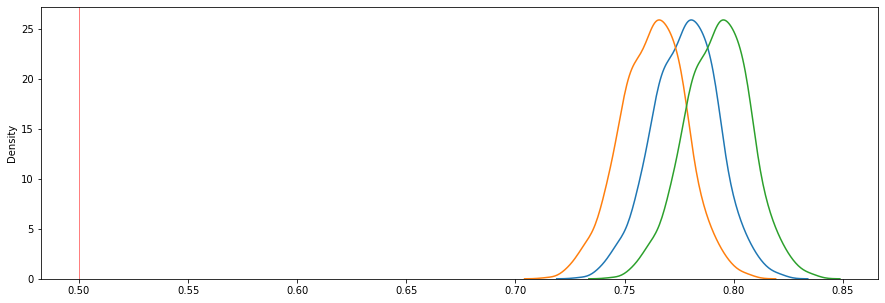

In [40]:
trials = 1000
means, err, cdfFin, ciFin = getSamples(probp, n=700, samples=trials,ciLow=2.5, ciHi=97.5)
lowest = means - err
highest = means + err
bWins = 0 
for i in range(len(means)):
    if means[i] > .5000:
        bWins = bWins + 1
print(bWins/trials)

sns.kdeplot(means)
sns.kdeplot(lowest)
sns.kdeplot(highest)
thinkplot.axvline(.5, color="red")

Fraction of Scenarios where purple team wins is 100.0% 
We are 95 percent confident that purple team will get between 74.7% and 80.7% percent of the vote


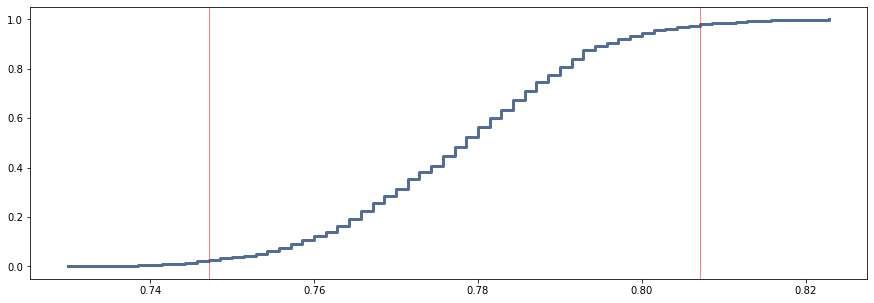

In [41]:
thinkplot.Cdf(cdfFin)
thinkplot.axvline(ciFin[0], color="red")
thinkplot.axvline(ciFin[1], color="red")
print("Fraction of Scenarios where purple team wins is %.1f%% " % ((1-cdfFin.Prob(.50))*100))
print("We are 95 percent confident that purple team will get between %.1f%% and %.1f%% percent of the vote" % (ciFin[0]*100, ciFin[1]*100))

##### Setup Turnout Data

The dataframe "past_vte_table" shows the voter turnout, along with the impact on the votes counted for the <b>Yellow party</b>, all expressed as percentages. For example, if in one row the turnout is .45 and the Yellow_improvement is -.04, that means that 45% of the populace turned out to vote, and the Yellow party got 4% fewer votes than polling indicated. Assum 60% of people are going to vote

In [12]:
# Please don't edit this part. Maybe linear regression 
# Setup vote data. 
voter_turnout_history = [.53, .51, .48, .55, .54, .59, .49, .57, .56]
past_vote_table = pd.DataFrame(voter_turnout_history, columns={"voter_turn_percentage"})
past_vote_table["Yellow_improvement"] = [.012, .023, -.017, .031, .030, -.004, -.03, .042, .029]
past_vote_table["year"] = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
past_vote_table.sample(9)

,voter_turn_percentage,Yellow_improvement,year
8,0.56,0.029,2021
2,0.48,-0.017,2015
7,0.57,0.042,2020
3,0.55,0.031,2016
4,0.54,0.030,2017
5,0.59,-0.004,2018
1,0.51,0.023,2014
6,0.49,-0.030,2019
0,0.53,0.012,2013


In [42]:
past_vote_table=past_vote_table[past_vote_table['voter_turn_percentage']<0.59]

In [43]:
intercept2, slope2 = thinkstats2.LeastSquares(past_vote_table["Yellow_improvement"], past_vote_table["voter_turn_percentage"])
res2 = thinkstats2.Residuals(past_vote_table["Yellow_improvement"],past_vote_table["voter_turn_percentage"], intercept2, slope2)
regLine = thinkstats2.FitLine(past_vote_table["Yellow_improvement"], intercept2, slope2)

print("Y intercept:", intercept2)
print("Slope:", slope2)

Y intercept: 0.5114907243816255
Slope: 1.150618374558304


<AxesSubplot:xlabel='Yellow_improvement', ylabel='voter_turn_percentage'>

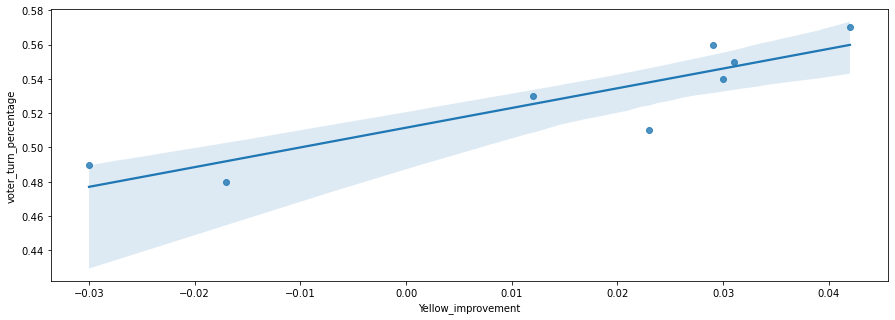

In [44]:
sns.regplot(x=past_vote_table["Yellow_improvement"], y=past_vote_table["voter_turn_percentage"], ci=95)

<AxesSubplot:xlabel='Yellow_improvement', ylabel='voter_turn_percentage'>

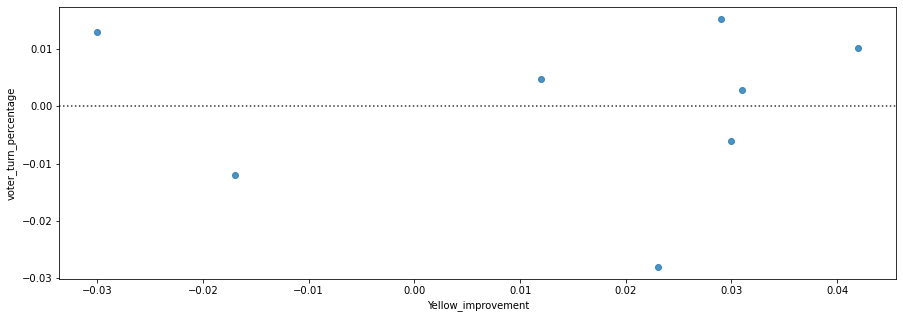

In [45]:
sns.residplot(x=past_vote_table["Yellow_improvement"], y=past_vote_table["voter_turn_percentage"])

In [46]:
y=np.array(past_vote_table["voter_turn_percentage"]).reshape(-1,1)
x=np.array(past_vote_table["Yellow_improvement"]).reshape(-1,1)
x.shape,y.shape

((8, 1), (8, 1))

In [50]:
def rmseFromResiduals(residuals):
    SSE = 0
    for i in range(len(residuals)):
        SSE += (residuals[i]**2)
    MSE = SSE/len(residuals)
    return math.sqrt(MSE)

In [47]:
model = LinearRegression().fit(x,y) 

In [51]:
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)
# Print the Intercept:
print('Intercept:', model.intercept_[0])
# Print the Slope:
print('Slope:', model.coef_[0][0]) 
print("RMSE", rmseFromResiduals(res2))

Coefficient of determination: 0.8006306152185326
Intercept: 0.5114907243816255
Slope: 1.1506183745583043
RMSE 0.013660061623905798


In [49]:
Improvement=(0.6-model.intercept_[0])/model.coef_[0][0]
Improvement

0.07692322456813813

### Part 2 - Regression

<b>Use the data provided to try to predict the wage. </b>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>split the data into a train and test group
<li>We made a polynomial model and got a r2 value of 0.28 which suggests tht our model is not very reliable in predicting what we want to predict
<li>We made a stat model and got the R2 that is around the same value. We can assum that linear regression is not best suited for this data
<li>We suspect that relationships that allow us to make predictions are at least partially non-linear. 
</ul>

In [20]:
df = pd.read_csv("players_20_2.csv")
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22


In [22]:
df.isnull().sum().sort_values()

wage_eur                      0
defending_marking             0
mentality_composure           0
mentality_penalties           0
mentality_vision              0
mentality_positioning         0
mentality_interceptions       0
mentality_aggression          0
power_long_shots              0
power_strength                0
power_stamina                 0
power_jumping                 0
power_shot_power              0
movement_balance              0
movement_reactions            0
movement_agility              0
movement_sprint_speed         0
movement_acceleration         0
skill_ball_control            0
skill_long_passing            0
skill_fk_accuracy             0
skill_curve                   0
skill_dribbling               0
attacking_volleys             0
attacking_short_passing       0
attacking_heading_accuracy    0
attacking_finishing           0
attacking_crossing            0
defending_standing_tackle     0
defending_sliding_tackle      0
dtype: int64

In [23]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   wage_eur                    18278 non-null  int64
 1   attacking_crossing          18278 non-null  int64
 2   attacking_finishing         18278 non-null  int64
 3   attacking_heading_accuracy  18278 non-null  int64
 4   attacking_short_passing     18278 non-null  int64
 5   attacking_volleys           18278 non-null  int64
 6   skill_dribbling             18278 non-null  int64
 7   skill_curve                 18278 non-null  int64
 8   skill_fk_accuracy           18278 non-null  int64
 9   skill_long_passing          18278 non-null  int64
 10  skill_ball_control          18278 non-null  int64
 11  movement_acceleration       18278 non-null  int64
 12  movement_sprint_speed       18278 non-null  int64
 13  movement_agility            18278 non-null  int64
 14  moveme

In [53]:
df_=df[df["wage_eur"]<10000]

In [54]:
y = np.array(df_["wage_eur"]).reshape(-1,1)
y.shape

(14158, 1)

In [55]:
x1=np.array(df_.drop(columns='wage_eur'))

In [56]:
print("X shape", x1.shape)
print("Y shape", y.shape)

X shape (14158, 29)
Y shape (14158, 1)


In [57]:
xTrainP,xTestP,yTrainP,yTestP = train_test_split(x1,y)

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#poly turns to y=x^2
poly = PolynomialFeatures(degree=2)
m2 = make_pipeline(poly, LinearRegression())
m2.fit(xTrainP,yTrainP)
ypred = m2.predict(xTestP)

In [59]:
rmse = np.sqrt(mean_squared_error(yTestP,ypred))
r2 = m2.score(xTestP,yTestP)
print(rmse)
print(r2) 

1868.4775766448624
0.27929633212421523


Another approach

In [32]:
df_2=df[df["wage_eur"]<10000]
df_2.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,14158.000000,14158.000000,14158.000000,14158.000000,14158.00000,14158.000000,14158.000000,14158.000000,14158.000000,14158.000000,...,14158.000000,14158.000000,14158.000000,14158.000000,14158.000000,14158.000000,14158.000000,14158.000000,14158.000000,14158.000000
mean,2839.666620,47.037364,42.952606,49.974008,56.02465,40.032914,52.800537,44.362904,40.205749,50.091185,...,43.737322,53.324340,44.098107,47.316500,50.893558,46.263102,55.444554,44.832038,45.723266,43.960093
std,2173.970008,17.424373,18.705080,16.753013,14.03447,16.366897,18.284413,17.183694,16.211277,14.535275,...,18.263364,16.779421,19.893299,18.676735,12.976026,15.004638,10.827929,19.200265,20.744039,20.267722
min,0.000000,5.000000,2.000000,5.000000,7.00000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,35.000000,28.000000,43.000000,52.00000,29.000000,46.000000,32.000000,29.000000,41.000000,...,29.000000,42.000000,24.000000,36.000000,42.000000,37.000000,49.000000,28.000000,25.000000,23.000000
50%,2000.000000,51.000000,46.000000,54.000000,60.00000,41.000000,59.000000,46.000000,39.000000,53.000000,...,48.000000,56.000000,50.000000,53.000000,53.000000,47.000000,57.000000,50.000000,53.000000,51.000000
75%,4000.000000,61.000000,59.000000,62.000000,65.00000,53.000000,65.000000,58.000000,52.000000,61.000000,...,59.000000,66.000000,62.000000,61.000000,61.000000,58.000000,63.000000,61.000000,64.000000,62.000000
max,9000.000000,85.000000,83.000000,91.000000,84.00000,85.000000,87.000000,87.000000,91.000000,83.000000,...,89.000000,94.000000,86.000000,84.000000,83.000000,87.000000,87.000000,85.000000,85.000000,85.000000


In [33]:
y2= np.array(df_2["wage_eur"]).reshape(-1,1)
df_2= df_2.drop(columns={"wage_eur"})
x2=np.array(df_2)
print("X shape", x2.shape)
print("Y shape", y2.shape)

X shape (14158, 29)
Y shape (14158, 1)


In [34]:
xTrain,xTest,yTrain,yTest = train_test_split(x1,y,test_size=.3)

In [35]:
import statsmodels.api as sm
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     176.1
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:06:19   Log-Likelihood:            -1.4347e+05
No. Observations:               12794   AIC:                         2.870e+05
Df Residuals:                   12764   BIC:                         2.872e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.57e+04   1899.675    -34.584      0.0

In [36]:
ypred = est2.predict(sm.add_constant(xTest))
mean_squared_error(yTest,ypred, squared=False)

18446.098537148053

In [37]:
model2 = LinearRegression().fit(x1,y)
ypred2 = model2.predict(x1)
mean_squared_error(y,ypred2,squared=False)

18088.850363912756